# LGM-VIP Data Science Internship
### Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM

#### Author - Suraj Goundar

###### Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

### Data processing

In [2]:
data = pd.read_csv('Stocklgmvip.csv')

In [3]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,27-07-2010,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
#Sort the dataset according to the date
data['Date'] = pd.to_datetime(data['Date'])
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2004,2010-01-09,121.65,123.65,120.2,122.7,123.00,2274887,2781.63
1983,2010-01-10,121.30,124.00,121.3,123.6,123.50,711861,875.04
1962,2010-01-11,126.00,128.40,123.0,124.5,124.55,1621553,2044.44
1941,2010-01-12,113.50,116.00,113.0,114.5,114.75,628391,722.87
2026,2010-02-08,117.30,118.50,116.6,118.1,117.30,663593,779.85


Index is not in order, lets make it in order

In [7]:
df.reset_index(inplace=True)

In [8]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2004,2010-01-09,121.65,123.65,120.2,122.7,123.00,2274887,2781.63
1,1983,2010-01-10,121.30,124.00,121.3,123.6,123.50,711861,875.04
2,1962,2010-01-11,126.00,128.40,123.0,124.5,124.55,1621553,2044.44
3,1941,2010-01-12,113.50,116.00,113.0,114.5,114.75,628391,722.87
4,2026,2010-02-08,117.30,118.50,116.6,118.1,117.30,663593,779.85


Plotting the graph of stocks at Close

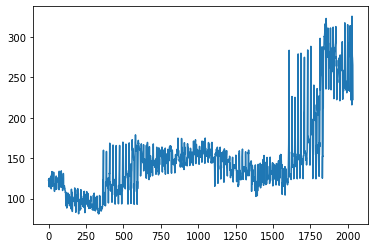

In [9]:
plt.plot(df['Close'])

In [10]:
df1 = df['Close']

### Feature Scaling

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17177288],
       [0.17381536],
       [0.17810458],
       ...,
       [0.76245915],
       [0.75265523],
       [0.57883987]])

### Splitting the data into training and test sets

In [12]:
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size


train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]

In [13]:
training_size, test_size

(1424, 611)

In [14]:
#convert an array of values into a dataset matrix
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [18]:
#Reshape input which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Building the Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 18s 656ms/step - loss: 0.0098 - val_loss: 0.0026
Epoch 2/60
19/19 [==============================] - 10s 545ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 3/60
19/19 [==============================] - 9s 464ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 4/60
19/19 [==============================] - 9s 469ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 5/60
19/19 [==============================] - 9s 454ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 6/60
19/19 [==============================] - 9s 459ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 7/60
19/19 [==============================] - 9s 479ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 8/60
19/19 [==============================] - 9s 472ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 9/60
19/19 [==============================] - 10s 518ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 10/60
19/19 [==============================] - 10s 544ms/step - loss: 0.0024 - val_loss: 0.

In [26]:
#Prediction of scaled test set
test_predict = model.predict(X_test)

In [27]:
#transform to original test set
test_predict1 = scaler.inverse_transform(test_predict)

In [28]:
test_predict1

array([[131.69844 ],
       [135.59511 ],
       [132.09679 ],
       [129.96153 ],
       [132.92859 ],
       [135.1748  ],
       [136.86966 ],
       [137.43909 ],
       [136.73245 ],
       [135.89746 ],
       [135.4063  ],
       [136.01833 ],
       [135.6952  ],
       [136.30412 ],
       [137.21263 ],
       [134.6774  ],
       [133.57874 ],
       [127.125206],
       [122.52161 ],
       [121.000244],
       [122.455795],
       [128.09236 ],
       [136.36925 ],
       [133.50055 ],
       [137.28142 ],
       [142.15433 ],
       [143.83089 ],
       [144.66962 ],
       [145.68564 ],
       [145.27722 ],
       [144.74637 ],
       [144.7629  ],
       [143.40536 ],
       [140.95932 ],
       [137.18294 ],
       [135.79158 ],
       [135.23749 ],
       [135.88092 ],
       [125.59466 ],
       [122.2138  ],
       [122.93881 ],
       [123.9304  ],
       [129.50198 ],
       [134.99573 ],
       [132.84084 ],
       [130.46838 ],
       [130.50537 ],
       [130.1

## Performance Metrics

#### Mean Square error

In [29]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(ytest, test_predict)) # MSE Is low

0.1413308847883689

Conclusion :
Predicted results resemble actual values to a good extent. Hence the model is successfully executed with near accurate expectancy.